# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


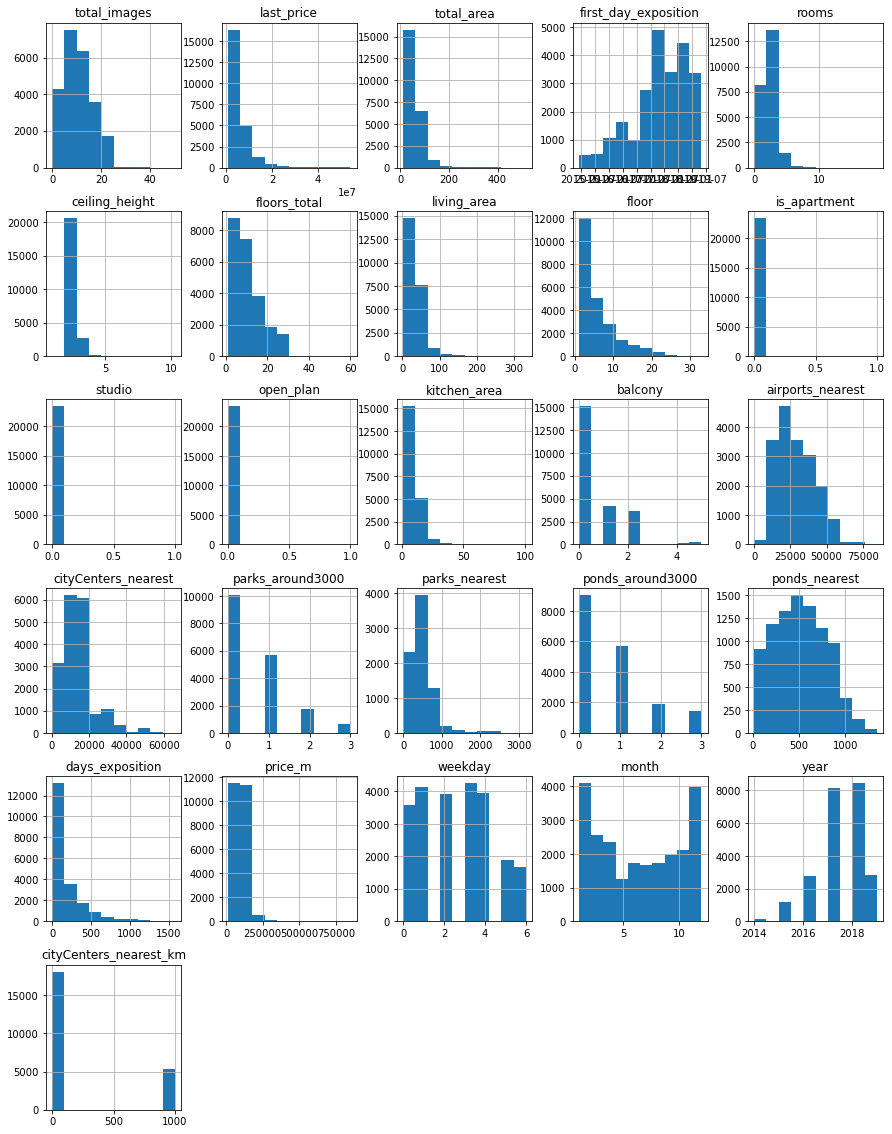

In [70]:
data.hist(figsize=(15, 20));

#### Промежуточный вывод

В данных достаточно много пропусков в разных колонках. Некоторые данные (высота потолка, цена), по видимому, внесены ошибочно. Но в целом качество данных можно считать удовлетворительным.

### Предобработка данных

In [9]:
data.isna().sum()  #оценка пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data['ceiling_height'].describe()
# пропусков много, среди значений есть явные ошибки (100 метров). Однако судя по средниму значению и медиане ошибочных
# значений немного.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
data['ceiling_height'].unique() #поиск аномальных значений

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [12]:
data['ceiling_height'] = data['ceiling_height'].replace({
    14.0: 1.4,
    27.5: 2.75,
    32.0: 3.2,
    25.0: 2.5,
    27.0: 2.7,
    26.0: 2.6,
    22.6: 2.26,
    24.0: 2.4,
    20.0: 2.0,
    100.0: 10.0,
    })
data['ceiling_height'].describe() #замена предположительно ошибочно введённых данных и проверка результата

count    14504.000000
mean         2.728739
std          0.306050
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isna().sum()   
#замена пропущенных значений общим медианным, для разбивки на категории и заменой пропуска на средние или 
#медианное значение внутри категории нет данных (тип дома и т.п.)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
data[['living_area', 'rooms']].groupby(['rooms']).median() 

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


In [15]:
data['living_area'] = data['living_area'].fillna(data[['living_area', 'rooms']].groupby(['rooms'])['living_area'].transform('median'))
data.isna().sum() #пропуски заполняются медианным значением в зависимости от количества комнат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].unique() 
#пропуск принимаем за отрицательный ответ (т.е. не апартамент)

array([False,  True])

In [18]:
data.is_apartment = data.is_apartment.astype(int) #изменение типа данных для облегчения анализа
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [19]:
data.studio = data.studio.astype(int)  #изменение типа данных для облегчения анализа
data.studio.value_counts() 

0    23550
1      149
Name: studio, dtype: int64

In [20]:
data.open_plan = data.open_plan.astype(int)   #изменение типа данных для облегчения анализа
data.open_plan.value_counts()

0    23632
1       67
Name: open_plan, dtype: int64

In [21]:
data['balcony'] = data['balcony'].fillna(0) #пропуск принимаем за отрицательный ответ (т.е. балкон отсутствует)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [22]:
print(data['locality_name'].sort_values().unique())            

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [23]:
data['locality_name'] = data['locality_name'].replace({     #долгий и трудоёмкий способ, но я увидел много дублей связанных и с 
    'городской поселок Большая Ижора': 'Большая Ижора',      # ошибками е-ё и с изменениями административных статусов населённых  
    'городской поселок Янино-1': 'Янино-1',                  # пунктов. 
    'городской посёлок Будогощь': 'Будогощь',
    'городской посёлок Виллози': 'Виллози',
    'городской посёлок Лесогорский': 'Лесогорский',
    'городской посёлок Мга': 'Мга', 
    'городской посёлок Назия': 'Назия',
    'городской посёлок Новоселье': 'Новоселье',
    'городской посёлок Павлово': 'Павлово',
    'городской посёлок Рощино': 'Рощино',
    'городской посёлок Свирьстрой': 'Свирьстрой',
    'городской посёлок Советский': 'Советский',
    'городской посёлок Фёдоровское': 'Фёдоровское',
    'городской посёлок Янино-1': 'Янино-1',
    'деревня Агалатово': 'Агалатово',
    'деревня Аро': 'Аро',
    'деревня Батово': 'Батово',
    'деревня Бегуницы': 'Бегуницы',
    'деревня Белогорка': 'Белогорка',
    'деревня Большая Вруда': 'Большая Вруда',
    'деревня Большая Пустомержа': 'Большая Пустомержа',
    'деревня Большие Колпаны': 'Большие Колпаны',
    'деревня Большое Рейзино': 'Большое Рейзино',
    'деревня Большой Сабск': 'Большой Сабск',
    'деревня Бор': 'Бор',
    'деревня Борисова Грива': 'Борисова Грива',
    'деревня Ваганово': 'Ваганово',
    'деревня Вартемяги': 'Вартемяги',
    'деревня Вахнова Кара': 'Вахнова Кара',
    'деревня Выскатка': 'Выскатка',
    'деревня Гарболово': 'Гарболово',
    'деревня Глинка': 'Глинка',
    'деревня Горбунки': 'Горбунки',
    'деревня Гостилицы': 'Гостилицы',
    'деревня Заклинье': 'Заклинье',
    'деревня Заневка': 'Заневка',
    'деревня Зимитицы': 'Зимитицы',
    'деревня Извара': 'Извара',
    'деревня Иссад': 'Иссад',
    'деревня Калитино': 'Калитино',
    'деревня Кальтино': 'Кальтино',
    'деревня Камышовка': 'Камышовка',
    'деревня Каськово': 'Каськово',
    'деревня Келози': 'Келози',
    'деревня Кипень': 'Кипень',
    'деревня Кисельня': 'Кисельня',
    'деревня Колтуши': 'Колтуши',
    'деревня Коркино': 'Коркино',
    'деревня Котлы': 'Котлы',
    'деревня Котлы': 'Котлы',
    'деревня Кудрово': 'Кудрово',
    'деревня Кузьмолово': 'Кузьмолово',
    'деревня Курковицы': 'Курковицы',
    'деревня Куровицы': 'Куровицы',
    'деревня Куттузи': 'Куттузи',
    'деревня Лаврики': 'Лаврики',
    'деревня Лаголово': 'Лаголово',
    'деревня Лампово': 'Лампово',
    'деревня Лесколово': 'Лесколово',
    'деревня Лопухинка': 'Лопухинка',
    'деревня Лупполово': 'Лупполово',
    'деревня Малая Романовка': 'Малая Романовка',
    'деревня Малое Верево': 'Малое Верево',
    'деревня Малое Карлино': 'Малое Карлино',
    'деревня Малые Колпаны': 'Малые Колпаны',
    'деревня Мануйлово': 'Мануйлово',
    'деревня Меньково': 'Меньково',
    'деревня Мины': 'Мины',
    'деревня Мистолово': 'Мистолово',
    'деревня Ненимяки': 'Ненимяки',
    'деревня Нижние Осельки': 'Нижние Осельки',
    'деревня Нижняя': 'Нижняя',
    'деревня Низино': 'Низино',
    'деревня Новое Девяткино': 'Новое Девяткино',
    'деревня Новолисино': 'Новолисино',
    'деревня Нурма': 'Нурма',
    'деревня Оржицы': 'Оржицы',
    'деревня Парицы': 'Парицы',
    'деревня Пельгора': 'Пельгора',
    'деревня Пеники': 'Пеники',
    'деревня Пижма': 'Пижма',
    'деревня Пикколово': 'Пикколово',
    'деревня Пудомяги': 'Пудомяги',
    'деревня Пустынка': 'Пустынка',
    'деревня Пчева': 'Пчева',
    'деревня Рабитицы': 'Рабитицы',
    'деревня Разбегаево': 'Разбегаево',
    'деревня Раздолье': 'Раздолье',
    'деревня Разметелево': 'Разметелево',
    'деревня Рапполово': 'Рапполово',
    'деревня Реброво': 'Реброво',
    'деревня Русско': 'Русско',
    'деревня Сижно': 'Сижно',
    'деревня Снегирёвка': 'Снегирёвка',
    'деревня Старая': 'Старая',
    'деревня Старая Пустошь': 'Старая Пустошь',
    'деревня Старое Хинколово': 'Старое Хинколово',
    'деревня Старополье': 'Старополье',
    'деревня Старосиверская': 'Старосиверская',
    'деревня Старые Бегуницы': 'Старые Бегуницы',
    'деревня Суоранда': 'Суоранда',
    'деревня Сяськелево': 'Сяськелево',
    'деревня Тарасово': 'Тарасово',
    'деревня Терпилицы': 'Терпилицы',
    'деревня Тихковицы': 'Тихковицы',
    'деревня Тойворово': 'Тойворово',
    'деревня Торосово': 'Торосово',
    'деревня Торошковичи': 'Торошковичи',
    'деревня Трубников Бор': 'Трубников Бор',
    'деревня Фалилеево': 'Фалилеево',
    'деревня Фёдоровское': 'Фёдоровское',
    'деревня Хапо-Ое': 'Хапо-Ое',
    'деревня Хязельки': 'Хязельки',
    'деревня Чудской Бор': 'Чудской Бор',
    'деревня Шпаньково': 'Шпаньково',
    'деревня Щеглово': 'Щеглово',
    'деревня Юкки': 'Юкки',
    'деревня Ялгино': 'Ялгино',
    'деревня Яльгелево': 'Яльгелево',
    'деревня Ям-Тесово': 'Ям-Тесово',
    'коттеджный поселок Кивеннапа Север': 'Кивеннапа Север',
    'коттеджный поселок Счастье': 'Счастье',
    'коттеджный посёлок Лесное': 'Лесное',
    'поселок Аннино': 'Аннино',
    'поселок Барышево': 'Барышево',
    'поселок Бугры': 'Бугры',
    'поселок Возрождение': 'Возрождение',
    'поселок Войсковицы': 'Войсковицы',
    'поселок Володарское': 'Володарское',
    'поселок Гаврилово': 'Гаврилово',
    'поселок Гарболово': 'Гарболово',
    'поселок Гладкое': 'Гладкое',
    'поселок Глажево': 'Глажево',
    'поселок Глебычево': 'Глебычево',
    'поселок Гончарово': 'Гончарово',
    'поселок Громово': 'Громово',
    'поселок Дружноселье': 'Дружноселье',
    'поселок Елизаветино': 'Елизаветино',
    'поселок Жилгородок': 'Жилгородок',
    'поселок Жилпосёлок': 'Жилпосёлок',
    'поселок Житково': 'Житково',
    'поселок Заводской': 'Заводской',
    'поселок Запорожское': 'Запорожское',
    'поселок Зимитицы': 'Зимитицы',
    'поселок Ильичёво': 'Ильичёво',
    'поселок Калитино': 'Калитино',
    'поселок Каложицы': 'Каложицы',
    'поселок Кингисеппский': 'Кингисеппский',
    'поселок Кирпичное': 'Кирпичное',
    'поселок Кобралово': 'Кобралово',
    'поселок Кобринское': 'Кобринское',
    'поселок Коммунары': 'Коммунары',
    'поселок Коробицыно': 'Коробицыно',
    'поселок Котельский': 'Котельский',
    'поселок Красная Долина': 'Красная Долина',
    'поселок Красносельское': 'Красносельское',
    'поселок Лесное': 'Лесное',
    'поселок Лисий Нос': 'Лисий Нос',
    'поселок Лукаши': 'Лукаши',
    'поселок Любань': 'Любань',
    'поселок Мельниково': 'Мельниково',
    'поселок Мичуринское': 'Мичуринское',
    'поселок Молодцово': 'Молодцово',
    'поселок Мурино': 'Мурино',
    'поселок Новый Свет': 'Новый Свет',
    'поселок Новый Учхоз': 'Новый Учхоз',
    'поселок Оредеж': 'Оредеж',
    'поселок Пансионат Зелёный Бор': 'Пансионат Зелёный Бор',
    'поселок Первомайское': 'Первомайское',
    'поселок Перово': 'Перово',
    'поселок Петровское': 'Петровское',
    'поселок Победа': 'Победа',
    'поселок Поляны': 'Поляны',
    'поселок Почап': 'Почап',
    'поселок Починок': 'Починок',
    'поселок Пушное': 'Пушное',
    'поселок Пчевжа': 'Пчевжа',
    'поселок Рабитицы': 'Рабитицы',
    'поселок Романовка': 'Романовка',
    'поселок Ромашки': 'Ромашки',
    'поселок Рябово': 'Рябово',
    'поселок Севастьяново': 'Севастьяново',
    'поселок Селезнёво': 'Селезнёво',
    'поселок Сельцо': 'Сельцо',
    'поселок Семиозерье': 'Семиозерье',
    'поселок Семрино': 'Семрино',
    'поселок Серебрянский': 'Серебрянский',
    'поселок Совхозный': 'Совхозный',
    'поселок Старая Малукса': 'Старая Малукса',
    'поселок Стеклянный': 'Стеклянный',
    'поселок Сумино': 'Сумино',
    'поселок Суходолье': 'Суходолье',
    'поселок Тельмана': 'Тельмана',
    'поселок Терволово': 'Терволово',
    'поселок Торковичи': 'Торковичи',
    'поселок Тёсово-4': 'Тёсово-4',
    'поселок Углово': 'Углово',
    'поселок Усть-Луга': 'Усть-Луга',
    'поселок Ушаки': 'Ушаки',
    'поселок Цвелодубово': 'Цвелодубово',
    'поселок Цвылёво': 'Цвылёво',
    'поселок городского типа Большая Ижора': 'Большая Ижора',
    'поселок городского типа Вырица': 'Вырица',
    'поселок городского типа Дружная Горка': 'Дружная Горка',
    'поселок городского типа Дубровка': 'Дубровка',
    'поселок городского типа Ефимовский': 'Ефимовский',
    'поселок городского типа Кондратьево': 'Кондратьево',
    'поселок городского типа Красный Бор': 'Красный Бор',
    'поселок городского типа Кузьмоловский': 'Кузьмоловский',
    'поселок городского типа Лебяжье': 'Лебяжье',
    'поселок городского типа Лесогорский': 'Лесогорский',
    'поселок городского типа Назия': 'Назия',
    'поселок городского типа Никольский': 'Никольский',
 'поселок городского типа Приладожский': 'Приладожский',
    'поселок городского типа Рахья': 'Рахья',
 'поселок городского типа Рощино': 'Рощино',
    'поселок городского типа Рябово': 'Рябово',
 'поселок городского типа Синявино': 'Синявино',
    'поселок городского типа Советский': 'Советский',
 'поселок городского типа Токсово': 'Токсово',
    'поселок городского типа Форносово': 'Форносово',
 'поселок городского типа имени Свердлова': 'имени Свердлова',
    'поселок станции Вещево': 'Вещево',
 'поселок станции Корнево': 'Корнево',
    'поселок станции Лужайка': 'Лужайка',
 'поселок станции Приветнинское': 'Приветнинское',
    'посёлок Александровская': 'Александровская',
 'посёлок Алексеевка': 'Алексеевка',
    'посёлок Аннино': 'Аннино',
    'посёлок Белоостров': 'Белоостров',
 'посёлок Бугры': 'Бугры',
    'посёлок Возрождение': 'Возрождение',
    'посёлок Войскорово': 'Войскорово',
 'посёлок Высокоключевой': 'Высокоключевой',
    'посёлок Гаврилово': 'Гаврилово',
    'посёлок Дзержинского': 'Дзержинского',
 'посёлок Жилгородок': 'Жилгородок',
    'посёлок Ильичёво': 'Ильичёво',
    'посёлок Кикерино': 'Кикерино',
 'посёлок Кобралово': 'Кобралово',
    'посёлок Коробицыно': 'Коробицыно',
    'посёлок Левашово': 'Левашово',
 'посёлок Ленинское': 'Ленинское',
    'посёлок Лисий Нос': 'Лисий Нос',
    'посёлок Мельниково': 'Мельниково',
 'посёлок Металлострой': 'Металлострой',
    'посёлок Мичуринское': 'Мичуринское',
    'посёлок Молодёжное': 'Молодёжное',
 'посёлок Мурино': 'Мурино',
    'посёлок Мыза-Ивановка': 'Мыза-Ивановка',
    'посёлок Новогорелово': 'Новогорелово',
 'посёлок Новый Свет': 'Новый Свет',
    'посёлок Пансионат Зелёный Бор': 'Пансионат Зелёный Бор',
    'посёлок Парголово': 'Парголово',
 'посёлок Перово': 'Перово',
    'посёлок Песочный': 'Песочный',
    'посёлок Петро-Славянка': 'Петро-Славянка',
 'посёлок Петровское': 'Петровское',
    'посёлок Платформа 69-й километр': 'Платформа 69-й километр',
    'посёлок Плодовое': 'Плодовое',
 'посёлок Плоское': 'Плоское',
    'посёлок Победа': 'Победа',
    'посёлок Поляны': 'Поляны',
    'посёлок Понтонный': 'Понтонный',
 'посёлок Пригородный': 'Пригородный',
    'посёлок Пудость': 'Пудость',
    'посёлок Репино': 'Репино',
    'посёлок Ропша': 'Ропша',
 'посёлок Сапёрное': 'Сапёрное',
    'посёлок Сапёрный': 'Сапёрный',
    'посёлок Сосново': 'Сосново',
 'посёлок Старая Малукса': 'Старая Малукса',
    'посёлок Стеклянный': 'Стеклянный',
    'посёлок Стрельна': 'Стрельна',
 'посёлок Суйда': 'Суйда',
    'посёлок Сумино': 'Сумино',
    'посёлок Тельмана': 'Тельмана',
    'посёлок Терволово': 'Терволово',
 'посёлок Торфяное': 'Торфяное',
    'посёлок Усть-Ижора': 'Усть-Ижора',
    'посёлок Усть-Луга': 'Усть-Луга',
 'посёлок Форт Красная Горка': 'Форт Красная Горка',
    'посёлок Шугозеро': 'Шугозеро',
    'посёлок Шушары': 'Шушары',
 'посёлок Щеглово': 'Щеглово',
    'посёлок городского типа Важины': 'Важины',
 'посёлок городского типа Вознесенье': 'Вознесенье',
    'посёлок городского типа Вырица': 'Вырица',
 'посёлок городского типа Красный Бор': 'Красный Бор',
    'посёлок городского типа Кузнечное': 'Кузнечное',
 'посёлок городского типа Кузьмоловский': 'Кузьмоловский',
    'посёлок городского типа Лебяжье': 'Лебяжье',
 'посёлок городского типа Мга': 'Мга',
    'посёлок городского типа Павлово': 'Павлово',
 'посёлок городского типа Рощино': 'Рощино',
    'посёлок городского типа Рябово': 'Рябово',
 'посёлок городского типа Сиверский': 'Сиверский',
    'посёлок городского типа Тайцы': 'Тайцы',
 'посёлок городского типа Токсово': 'Токсово',
    'посёлок городского типа Ульяновка': 'Ульяновка',
 'посёлок городского типа Форносово': 'Форносово',
 'посёлок городского типа имени Морозова': 'имени Морозова',
 'посёлок городского типа имени Свердлова': 'имени Свердлова',
 'посёлок при железнодорожной станции Вещево': 'Вещево',
 'посёлок при железнодорожной станции Приветнинское': 'Приветнинское',
 'посёлок станции Громово': 'Громово',
    'посёлок станции Свирь': 'Свирь',
 'садоводческое некоммерческое товарищество Лесная Поляна': 'Лесная Поляна',
 'садовое товарищество Новая Ропша': 'Новая Ропша',
    'садовое товарищество Приладожский': 'Приладожский',
 'садовое товарищество Рахья': 'Рахья',
    'садовое товарищество Садко': 'Садко',
    'село Копорье': 'Копорье',
 'село Никольское': 'Никольское',
    'село Павлово': 'Павлово',
    'село Паша': 'Паша',
    'село Путилово': 'Путилово',
 'село Рождествено': 'Рождествено',
    'село Русско-Высоцкое': 'Русско-Высоцкое',
    'село Старая Ладога': 'Старая Ладога',
    'село Шум': 'Шум',
})

In [24]:
data.locality_name.fillna('unknown', inplace=True)

In [25]:
print(data['locality_name'].sort_values().unique()) 

['unknown' 'Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро'
 'Барышево' 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпосёлок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кинги

In [26]:
max_lim = data['last_price'].quantile(0.995)     #для удаления выбросов выбрал столбец цены как интегративный показатель,
min_lim = data['last_price'].quantile(0.005)      #  и квантиль отсекающий 0,5% объектов с экстремально высокой и низкой        
data = data[(data['last_price'] < max_lim) & (data['last_price'] > min_lim)]  #ценой. Применение этого же квантиля ко всем 
#численным показателям удаляет из массива данных до 70% строк.


In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d') #изменение типа данных и округление до 1 дня

In [28]:
data.duplicated().sum()

0

In [29]:
data.isna().sum()
# оставшиеся пропуски заполнить проблематично, этажность здания выяснить невозможно, так как нет данных о типе дома. 
# площадь кухни можно принять за 0 в строках, где указаны студии и свободная планировка,но это в лучшем случае уберёт 
# 10% пропусков (этих типов всего 216 строк). Характеристики окружения и расстояния до центра и аэропорта можно было бы
# заполнить при наличии координат объектов. 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2235
balcony                     0
locality_name               0
airports_nearest         5415
cityCenters_nearest      5394
parks_around3000         5393
parks_nearest           15470
ponds_around3000         5393
ponds_nearest           14448
days_exposition          3138
dtype: int64

In [30]:
data['cityCenters_nearest'].describe() #данные без видимых аномалий, коррекции не требует

count    18062.000000
mean     14254.617207
std       8598.481831
min        181.000000
25%       9377.000000
50%      13145.000000
75%      16318.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [31]:
data['airports_nearest'].describe()  #данные без видимых аномалий, коррекции не требует

count    18041.00000
mean     28808.38734
std      12665.05848
min          0.00000
25%      18539.00000
50%      26758.00000
75%      37347.00000
max      84869.00000
Name: airports_nearest, dtype: float64

In [32]:
data['parks_around3000'].describe()  #данные без видимых аномалий, коррекции не требует

count    18063.000000
mean         0.604717
std          0.795558
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [33]:
data['ponds_nearest'].describe()   #данные без видимых аномалий, коррекции не требует

count    9008.000000
mean      519.863233
std       277.920202
min        13.000000
25%       296.000000
50%       503.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [34]:
data['days_exposition'].describe()  #данные без видимых аномалий, коррекции не требует

count    20318.000000
mean       180.258736
std        219.265532
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [35]:
data.balcony = data.balcony.astype(int)
#data['floors_total'].dropna()
#data.floors_total = data.floors_total.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23456 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23456 non-null  int64         
 1   last_price            23456 non-null  float64       
 2   total_area            23456 non-null  float64       
 3   first_day_exposition  23456 non-null  datetime64[ns]
 4   rooms                 23456 non-null  int64         
 5   ceiling_height        23456 non-null  float64       
 6   floors_total          23370 non-null  float64       
 7   living_area           23456 non-null  float64       
 8   floor                 23456 non-null  int64         
 9   is_apartment          23456 non-null  int32         
 10  studio                23456 non-null  int32         
 11  open_plan             23456 non-null  int32         
 12  kitchen_area          21221 non-null  float64       
 13  balcony         

#### Промежуточный вывод

Не получилось заполнить все пропуски. Вероятнее всего, при заполнении граф расстояния от центра до аэропорта данные вносились вручную, автоматизировав этот шаг (определение координат по адресу с расчётом расстояний) можно было бы это исправить. Так же предложение заполнения адреса по полицейской базе с указанием типа поселения со временем приводит к искажению данных (в 2015 году Мурино и Кудрово - деревни, но в 2019 уже уже города).

### Посчитайте и добавьте в таблицу новые столбцы

In [36]:
data['price_m'] = data['last_price']/data['total_area']

In [37]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [38]:
data['month'] = data['first_day_exposition'].dt.month

In [39]:
data['year'] = data['first_day_exposition'].dt.year

In [40]:
def generate_floor_type (floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(lambda x: generate_floor_type(x['floor'], x['floors_total']), axis=1)
# разбитие на 3 категории исходя из этажа объекта

In [41]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).apply(np.floor) #перевод в км

### Проведите исследовательский анализ данных

count    23456.000000
mean        59.412119
std         31.342117
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        517.000000
Name: total_area, dtype: float64

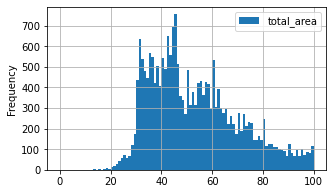

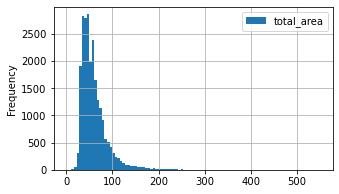

In [42]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,550))
data['total_area'].describe()

Распределение данных соответствует ожидаемому. Пики на гистограмме указывают на типичный метраж 1,2 и 3 -комнатных квартир. Медианное значение меньше среднего, что говорит о преобладании квартир небольшой площади на рынке.

count    23456.000000
mean        33.850151
std         19.767131
min          2.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        332.000000
Name: living_area, dtype: float64

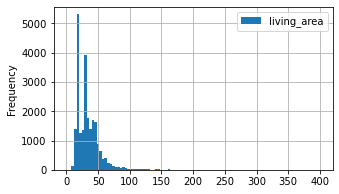

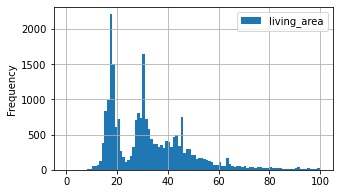

In [43]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,400))
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))
data['living_area'].describe()

Распределение данных соответствует ожидаемому. Пики на гистограмме указывают на типичный жилой метраж 1,2 и 3 -комнатных квартир. Медианное значение меньше среднего, что говорит о преобладании квартир небольшой площади на рынке.

count    21221.000000
mean        10.466957
std          5.449043
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64

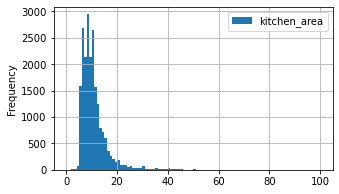

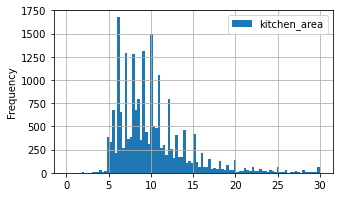

In [44]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,30))
data['kitchen_area'].describe()

Большинство предложений на рынке - квартиры с небольшими кухнями (вторичное жильё и новостройки эконом-класса), большие кухни (перепланировка старого фонда, кухни-гостиные) представлены слабо.

count    2.345600e+04
mean     6.051619e+06
std      5.082551e+06
min      8.200000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      5.400000e+07
Name: last_price, dtype: float64

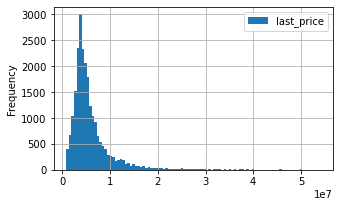

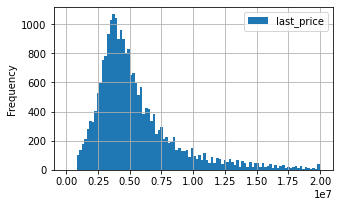

In [45]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,20000000))
data['last_price'].describe()

На рынке пребладает более дешёвое жильё.

count    23456.000000
mean         2.060454
std          1.058113
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

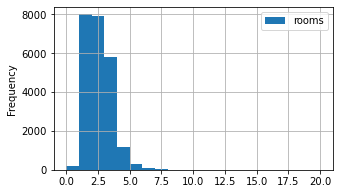

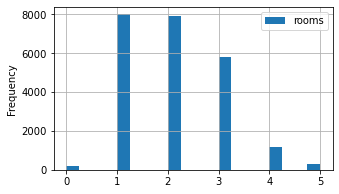

In [46]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,20))
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,5))
data['rooms'].describe()

На рынке преобладают одно- и двухкомнатные квартиры, неожиданно очень небольшое предложение студий.

count    23456.000000
mean         2.695744
std          0.235040
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

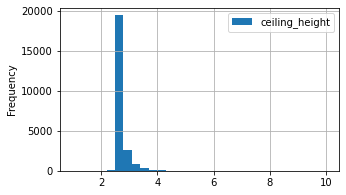

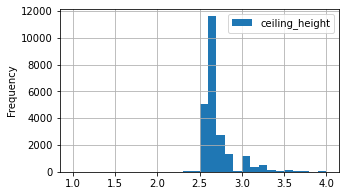

In [47]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (1,10), grid=True, figsize = (5,3))
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (1,4), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Основная масса жилья с высотой потолка от 2,5 до 2,7 метра - это квартиры от 1960-х годов постройки до современного эконом класса, потолки от 3,0 до 3,3, вероятнее всего, "сталинки" или современное дорогое жильё, небольшое количество квартир в высотой потолка выше - старый фонд.

count    23456.000000
mean         5.911238
std          4.896112
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

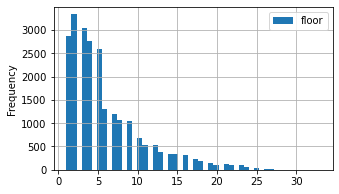

In [48]:
data.plot(y = 'floor', kind = 'hist', bins = 50, grid=True, figsize = (5,3))
data['floor'].describe()

Основная масса продающихся квартир расположены до 5 этажа включительно.

<AxesSubplot:>

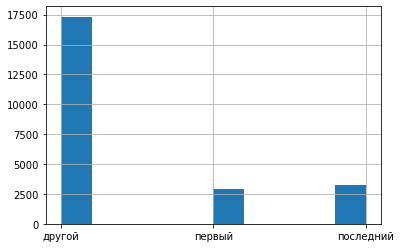

In [49]:
data['floor_type'].hist()

<AxesSubplot:>

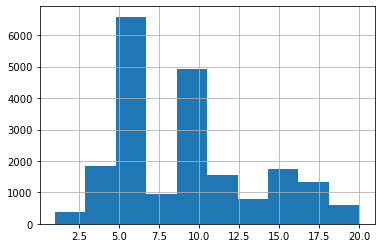

In [50]:
data['floors_total'].hist(range = (1,20))

Основная масса квартир расположены в 5 и 9-этажных домах (дома 60-80 гг постройки)

<AxesSubplot:>

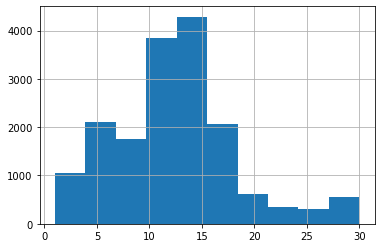

In [51]:
data['cityCenters_nearest_km'].hist(range = (1,30))

Большая часть квартир расположенв в поясе от 10 до 15 км от центра города. Это соответствует спальным районам советской постройки.

<AxesSubplot:>

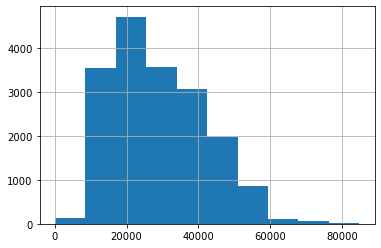

In [52]:
data['airports_nearest'].hist()

<AxesSubplot:>

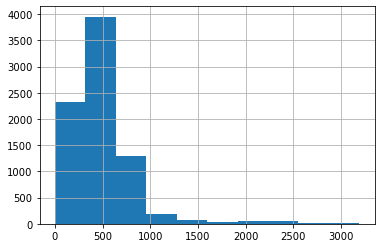

In [53]:
data['parks_nearest'].hist()

С учётом того, что в этой колонке много пропусков, там, где этот показатель указывали, продавцы подчёркивали, что есть парк в шаговой доступности (до 1 км, т.е. 10-15 мин прогулки)

<AxesSubplot:>

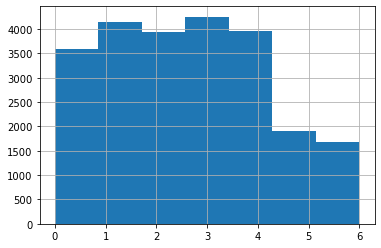

In [54]:
data['weekday'].hist(bins=7)

Большая часть объявлений была размещена в рабочие дни. Связано это, вероятно, с тем, что поданы они агентствами по продаже нежвижимости (работающими 5-дневную рабочую неделю)

<AxesSubplot:>

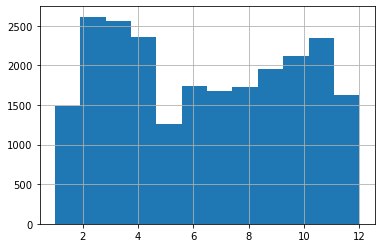

In [55]:
data['month'].hist(bins=12)

Меньшее кол-во объявлений в январе, мае связано с большимм количеством праздников (рабочих дней мало, агентства не работают). В декабре финал годового рабочего цикла, меньше желание открывать новые сделки.

count    20318.000000
mean       180.258736
std        219.265532
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

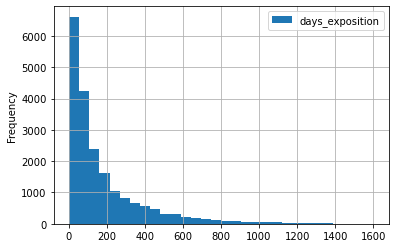

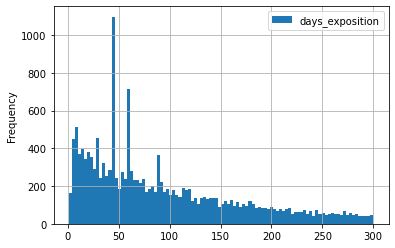

In [56]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))
data['days_exposition'].describe()

Средний срок продажи 180 дней, однако медиана 95 дней; соответственно есть некоторое кол-во объектов, продающихся очень долго- до 1580 дней (в нашей базе). Причины могут быть разные. На гистограмме отчётливо видны пики 45, 60, 90 дней. Скорее всего это отрезки автоматического снятия объявления. Объект может быть уже продан, но объявление продолжает висеть до этого срока. Быстрой продажей можно считать до 45 дней, долгой - выше 230 дней.

In [57]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,cityCenters_nearest_km
total_images,1.000000,0.142924,0.105548,0.090799,0.038238,0.011024,0.094395,0.031609,0.010676,-0.029357,...,0.014542,-0.003895,-0.016980,0.000959,-0.030440,0.134097,-0.009098,0.004667,0.142882,-0.043471
last_price,0.142924,1.000000,0.779991,0.507332,0.373609,0.025331,0.665864,0.046344,0.039887,-0.046901,...,0.203495,0.006194,0.204175,-0.113740,0.128147,0.686287,-0.016370,0.004137,-0.043850,-0.328226
total_area,0.105548,0.779991,1.000000,0.779756,0.335779,-0.074914,0.910709,-0.032333,0.018952,-0.080689,...,0.151789,-0.007999,0.148241,-0.085077,0.150994,0.177723,-0.010692,0.006077,-0.077891,-0.224241
rooms,0.090799,0.507332,0.779756,1.000000,0.201849,-0.230933,0.869600,-0.156225,-0.002587,-0.150122,...,0.125586,-0.048175,0.080867,-0.048147,0.123407,-0.027134,-0.004849,-0.005088,-0.051637,-0.174086
ceiling_height,0.038238,0.373609,0.335779,0.201849,1.000000,-0.074733,0.309472,-0.040184,0.085553,0.010877,...,0.199867,-0.048218,0.172674,-0.098705,0.093624,0.278066,-0.018734,0.000308,-0.046991,-0.265818
floors_total,0.011024,0.025331,-0.074914,-0.230933,-0.074733,1.000000,-0.177789,0.677084,-0.026176,0.069825,...,-0.250514,0.095543,-0.119096,0.035824,-0.051358,0.201227,0.014455,0.015939,0.007558,0.015346
living_area,0.094395,0.665864,0.910709,0.869600,0.309472,-0.177789,1.000000,-0.109625,0.017341,-0.060357,...,0.168257,-0.044445,0.131375,-0.067910,0.139016,0.085528,-0.009874,-0.000780,-0.070653,-0.216835
floor,0.031609,0.046344,-0.032333,-0.156225,-0.040184,0.677084,-0.109625,1.000000,-0.013823,0.036742,...,-0.163858,0.071820,-0.075667,0.024661,-0.039459,0.161563,0.012570,0.018851,0.005203,0.007908
is_apartment,0.010676,0.039887,0.018952,-0.002587,0.085553,-0.026176,0.017341,-0.013823,1.000000,-0.003621,...,0.017850,-0.030066,0.023315,0.002686,0.010974,0.052874,-0.010104,0.002362,0.013898,0.006074
studio,-0.029357,-0.046901,-0.080689,-0.150122,0.010877,0.069825,-0.060357,0.036742,-0.003621,1.000000,...,-0.029948,0.008987,0.001482,0.002108,-0.022399,0.022528,-0.000689,0.000956,0.011905,-0.007304


В оценке данных представляется логичным определение влияния различных факторов на цену квадратного метра жилья (price_m). По табличным данных можно сказать, что высокие потолки, большая этажность дома и расположение на верхних этажах, большая кухня,  близость к паркам и водоёмам, близость к центру города увеличивает увеличивает стоимость квадратного метра жилья.

0.7799908522498994

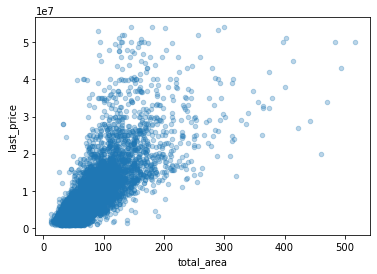

In [58]:
data[['total_area', 'last_price']].plot(kind='scatter', x='total_area', y='last_price', alpha = 0.3)
data['total_area'].corr(data['last_price'])

Общая стоимость прямо зависит от общей площади жилья.

0.6658635349187155

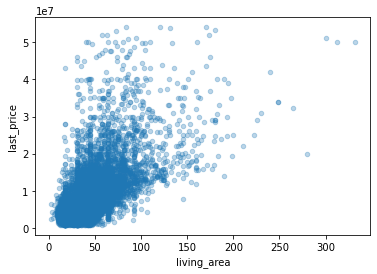

In [59]:
data[['living_area', 'last_price']].plot(kind='scatter', x='living_area', y='last_price', alpha = 0.3)
data['living_area'].corr(data['last_price'])

Общая стоимость прямо зависит от жилой площади жилья.

0.5994175906879573
0.35319122970165506


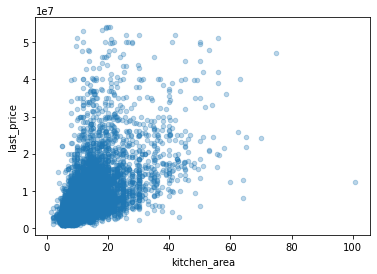

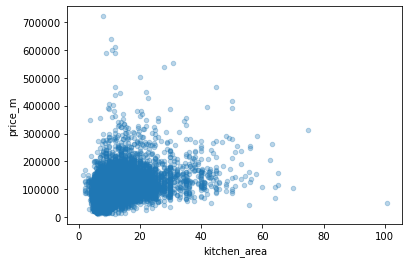

In [60]:
data[['kitchen_area', 'last_price']].plot(kind='scatter', x='kitchen_area', y='last_price', alpha = 0.3)
data[['kitchen_area', 'price_m']].plot(kind='scatter', x='kitchen_area', y='price_m', alpha = 0.3)
print(data['kitchen_area'].corr(data['last_price']))
print(data['kitchen_area'].corr(data['price_m']))

Увеличение площади кухни увеличивает и общую стоимость квартиры и стоимость квадратного метра

0.5073322426913036

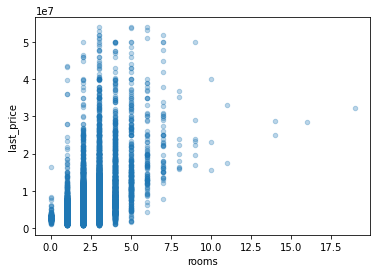

In [61]:
data[['rooms', 'last_price']].plot(kind='scatter', x='rooms', y='last_price', alpha = 0.3)
data['rooms'].corr(data['last_price'])

Увеличение количества комнат (и соответственно, площади квартиры) увеличивает общую стоимость.

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

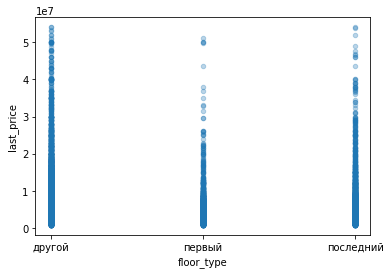

In [62]:
data[['floor_type', 'last_price']].plot(kind='scatter', x='floor_type', y='last_price', alpha = 0.3)

На первых этажах практически не встречаются дорогие квартиры, чаще они на средних этажах и, реже, на последних.

,mean,count,median
weekday,,,
1,6.045450e+06,4148,4740000.0
2,6.148283e+06,3937,4700000.0
0,6.105453e+06,3583,4650000.0
3,6.271637e+06,4252,4640000.0
4,5.871987e+06,3956,4577500.0
5,5.816495e+06,1900,4577500.0
6,5.857556e+06,1680,4550000.0


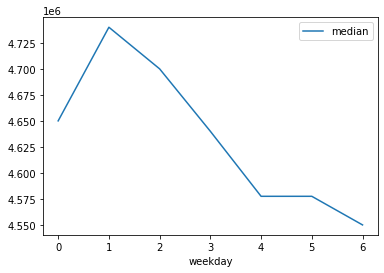

In [63]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Интересная зависимость получилась: медианная цена квартир, выставленных в выходные дни меньше, чем в будни. Связано это, вероятно, с тем, что выставляются они не агентствами, в структуру цены не закладывается агентская комиссия.

,mean,count,median
month,,,
4,6.010425e+06,2355,4800000.0
9,6.137514e+06,1959,4700000.0
11,6.213288e+06,2351,4700000.0
12,6.101721e+06,1621,4690000.0
2,6.105054e+06,2614,4650000.0
3,5.947962e+06,2566,4650000.0
7,6.056370e+06,1671,4650000.0
1,6.165730e+06,1481,4600000.0
8,6.072924e+06,1731,4590000.0


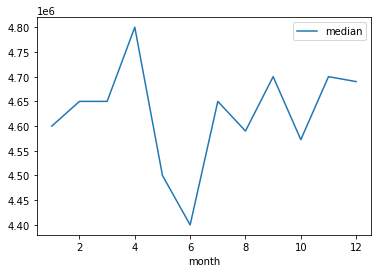

In [64]:
pivot_table_month_exposition = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Получены интересные данные: минимальная медианная цены наблюдается в июне, при чём в этом месяце рынок не перегружен предложениями, соответственно, мотивом снижения цены может быть стремление ускорить продажу. Возможно это связано с окончанием учебного года, семьи с детьми стремятся совместить переезд (поиск новой школы, детского сада) с летними каникулами.

,mean,count,median
year,,,
2014,1.079448e+07,134,7540000.0
2015,7.179744e+06,1168,5300000.0
2019,6.387445e+06,2850,5065000.0
2018,5.746715e+06,8438,4590000.0
2016,6.133689e+06,2746,4540000.0
2017,5.982298e+06,8120,4500000.0


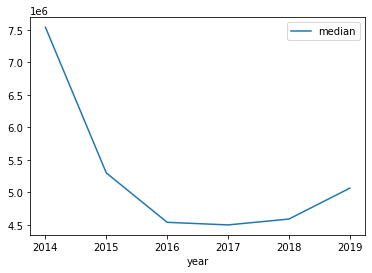

In [65]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)


,mean,count,median
year,,,
2014,120097.597369,134,106636.307595
2019,106171.661991,2850,103459.085753
2018,97557.959377,8438,95819.816859
2015,99449.117278,1168,93103.120244
2017,95951.163362,8120,92500.000000
2016,96453.405847,2746,91666.666667


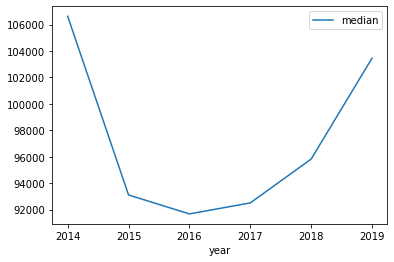

In [66]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'price_m', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)


При оценке по годам не общей стоимости, а цены квадратного метра, ценовой провал стал круче. И если по 2014 году вывод прежний - квартир мало, но они большие и дорогие, то в 2015-17 годах на площадке становится больше дешёвых квартир. Восходящий участок 2018-2019 гг - это появление на рынке квартир гораздо меньшей площади, но более дорогих.

In [67]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Оценивать изменения среднегодовой цены достаточно сложно, в 2014-2015 сервис наращивал популярность и, вероятнее всего, там размещались (как на неосновной площадке) объявления о продаже дорогой недвижимости для максимального охвата аудитории. В 16-18 годах изменения незначительные (инфляция, колебания рынка), рост медианной цены в 2019 году связан с попаданием в базу объявлений выставленных только до 3 мая. Рост цены связан и с увеличением инфляции в первой половине 2019 года и с ценовыми скачками внутри года (пик - апрель, как видно из предидущего графика)

In [68]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_m', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

                 count           mean
locality_name                        
Санкт-Петербург  15601  112396.075062
Мурино             590   86087.512050
Кудрово            472   95324.930544
Шушары             440   78677.364217
Всеволожск         398   68654.473986
Пушкин             369  103125.819291
Колпино            338   75424.579098
Парголово          327   90175.913458
Гатчина            307   68746.146763
Выборг             235   58454.498311
                 count           mean
locality_name                        
Санкт-Петербург  15601  112396.075062
               count          mean
locality_name                     
Выборг           235  58454.498311


В топ-10 по количеству предложений ожидаемо сам Санкт-Петербург, ближайшие к городу новостройки (Мурино, Кудрово, Шушары) и "старые" города (но также с большим количеством новостороек - Всеволожск, Пушкин, Колпино, Парголово). Все эти места имеют хорошие транспртные связи с Санкт-Петербургом. На 9 и 10 местах города расположенные дальше (Гатчина и Выборг). 

,price_m
cityCenters_nearest_km,
0,162794.886633
1,140681.719410
2,129943.756279
3,121597.829265
4,133965.317281
5,138415.343949
6,142951.731720
7,133120.949091
8,120378.202490


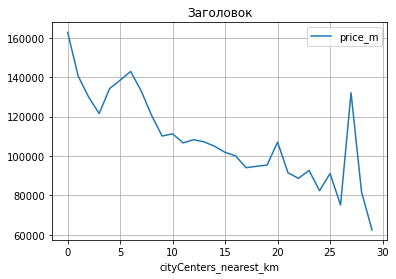

In [69]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1000) #заменяем пропущенные занчения
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=1000').pivot_table(index = 'cityCenters_nearest_km', values = 'price_m', aggfunc = 'mean')
pivot_table_km.plot(grid = True, title = 'Заголовок')
data[['cityCenters_nearest_km', 'price_m']].groupby(['cityCenters_nearest_km']).mean().head(15)


Если рассмотривать в пределах города (примерный радиус 15 км), то в среднем 1 км удаления от центра снижает стоимость квадратного метра на 3854 рубля. Пики на графике, скорее всего, соответствуют: 5-6 км - дорогое жильё на Крестовском острове, а 27 км - это уже Пушкин, где также дорогое жильё (см таблицу выше)

#### Промежуточный вывод

Проводилась оценка всего рынка. Преобладают на рынке 1-2-3 комнатные квартиры, расположенные в 5 и 9-этажных домах спальных районов застройки 60-80-х годов. Большая часть объявлений была подана агентствами недвижимости. Цена квартир зависит от ряда факторов - высокие потолки, большая этажность дома и расположение на верхних этажах, большая кухня,  близость к паркам и водоёмам, близость к центру города увеличивает увеличивает стоимость квадратного метра жилья.

### Общий вывод

Проводился анализ объявлений по продаже квартир с Санкт-Петербурге и Ленинградской области за 2014-2019 гг. Данные удовлетворительного качества, есть пропущенные и ошибочно введённые данные. Преобладают на рынке 1-2-3 комнатные квартиры, расположенные в 5 и 9-этажных домах спальных районов Санкт-Петербурга застройки 60-80-х годов. Большая часть объявлений была подана агентствами недвижимости. Цена квартир зависит от ряда факторов - высокие потолки, большая этажность дома и расположение на верхних этажах, большая кухня,  близость к паркам и водоёмам, близость к центру города увеличивает увеличивает стоимость квадратного метра жилья. Максимальные средние цены на квартиры расположенные с самом Санкт-Петербурге, Пушкине и ближайших к Санкт-Петербургу новостройках - Кудрово и Мурино. Медиана срока размещения объявления 95 дней.